You can download the data from the following link:

https://data.montgomerycountymd.gov/Public-Safety/MCFRS-Incidents-by-Station/mf5d-mtzf

In [253]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [240]:
!ls 

Fire Department Analysis.ipynb
MCFRS_Incidents_by_Station.csv


In [3]:
df = pd.read_csv('MCFRS_Incidents_by_Station.csv')

In [254]:
df.head()

,Fire Station,Fire Station Number,Nature of 911 call,Monthly Total,Year,Month,Month Num,Station address
0,Kensington Volunteer Fire Department (Station 18),18,PREGNANCY,2,2017,MAY,5,"12251 Georgia Ave Wheaton, MD 20902"
1,Sandy Spring Volunteer Fire Department (40),40,BACK PAIN,5,2018,SEPTEMBER,9,"16911 Georgia Ave Olney, MD 20832"
2,Silver Spring Volunteer Fire Department (Stati...,16,INHALATION,1,2017,JUNE,6,"111 University Blvd East Silver Spring, MD 20901"
3,Gaithersburg-Washington Grove Volunteer Fire D...,8,EYE INJURY,3,2018,SEPTEMBER,9,"801 Russell Ave Gaithersburg, MD 20879"
4,Bethesda Fire Department (Station 20),20,MEDICAL INCIDENT,7,2018,SEPTEMBER,9,"9041 Old Georgetown Rd Bethesda, MD 20814"


## Questions to consider

1. How many "volunteer" fire departments are included in this data?  What is the percentage of such volunteer fire departments out of all fire deparments included? 
1. What are the 10 most numerous 911 calls (i.e. 'Nature of the 911 call') reported in this data set?  
1. The data includes years from 2016-2021 (obviously 2021 isn't finished).  What are the five call types that experienced the most percentage increase from 2019 to 2020?  
1. Which fire stations responded to more than twice the average number of 'FIRE ALARM' calls in 2019 and 2020 combined? 
1. For all years, how many incidents were recorded for 'FALLS' for each fire department, and what percentage of the calls were for 'FALLS' (for each department)?

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54308 entries, 0 to 54307
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Fire Station         54308 non-null  object
 1   Fire Station Number  54308 non-null  object
 2   Nature of 911 call   53093 non-null  object
 3   Monthly Total        54308 non-null  int64 
 4   Year                 54308 non-null  object
 5   Month                54308 non-null  object
 6   Month Num            54308 non-null  object
 7   Station address      54308 non-null  object
dtypes: int64(1), object(7)
memory usage: 3.3+ MB


In [233]:
df = df.astype({'Fire Station Number':'object', 'Year':'object', 'Month Num':'object'})

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54308 entries, 0 to 54307
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Fire Station         54308 non-null  object
 1   Fire Station Number  54308 non-null  object
 2   Nature of 911 call   53093 non-null  object
 3   Monthly Total        54308 non-null  int64 
 4   Year                 54308 non-null  object
 5   Month                54308 non-null  object
 6   Month Num            54308 non-null  object
 7   Station address      54308 non-null  object
dtypes: int64(1), object(7)
memory usage: 3.3+ MB


In [235]:
df.describe(include= [np.object]).T

,count,unique,top,freq
Fire Station,54308,36,Gaithersburg-Washington Grove Volunteer Fire D...,2078
Fire Station Number,54308,36,8,2078
Nature of 911 call,53093,75,PERSONAL INJURY COLLISION,1495
Year,54308,6,2018,15571
Month,54308,12,JULY,5387
Month Num,54308,12,7,5387
Station address,54308,36,"801 Russell Ave Gaithersburg, MD 20879",2078


In [236]:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Monthly Total,54308.0,10.494273,33.539822,1.0,1.0,3.0,9.0,853.0


#### How many "volunteer" fire departments are included in this data?  What is the percentage of such volunteer fire departments out of all fire deparments included? 

In [219]:
print(df['Fire Station'].nunique())
df['Fire Station'].unique()

36


array(['Kensington Volunteer Fire Department (Station 18)',
       'Sandy Spring Volunteer Fire Department (40)',
       'Silver Spring Volunteer Fire Department (Station 16)',
       'Gaithersburg-Washington Grove Volunteer Fire Department (Station 8)',
       'Bethesda Fire Department (Station 20)',
       'Burtonsville Volunteer Fire Department (Station 15)',
       'Kensington Volunteer Fire Department (Station 21)',
       'Kingsview Fire Department (Station 22)',
       'Silver Spring Volunteer Fire Department (Station 19)',
       'Germantown-Milestone Fire Department (Station 34)',
       'Sandy Spring Volunteer Fire Department (Station 4)',
       'Kensington Volunteer Fire Department (Station 25)',
       'Hillandale Volunteer Fire Department (Station 12)',
       'Hillandale Volunteer Fire Department (Station 24)',
       'Bethesda Fire Department (Station 6)',
       'Glen Echo Volunteer Fire Department (Station 11)',
       'Laytonsville District Volunteer Fire Department 

In [221]:
total_volunteer = df[df['Fire Station'].str.lower().str.contains('volunteer')]['Fire Station'].nunique()
total_volunteer 

27

In [222]:
percent_volunteer = 27/df['Fire Station'].nunique()*100
percent_volunteer

75.0

#### What are the 10 most numerous 911 calls (i.e. 'Nature of the 911 call') reported in this data set? 

In [223]:
df['Nature of 911 call'].nunique()

75

In [224]:
call = df.groupby('Nature of 911 call').sum()[['Monthly Total']].rename(columns = {'Monthly Total':'Total'})
call.sort_values(by='Total', ascending= False).reset_index()

,Nature of 911 call,Total
0,SICK,49753
1,FALLS,36852
2,PERSONAL INJURY COLLISION,31794
3,FIRE ALARM,29074
4,TROUBLE BREATHING,27848
...,...,...
70,BOMB THREAT,25
71,TRAIN INCIDENT,4
72,AIRPLANE INCIDENT,3
73,ALARM / SPRINKLR OOS,1


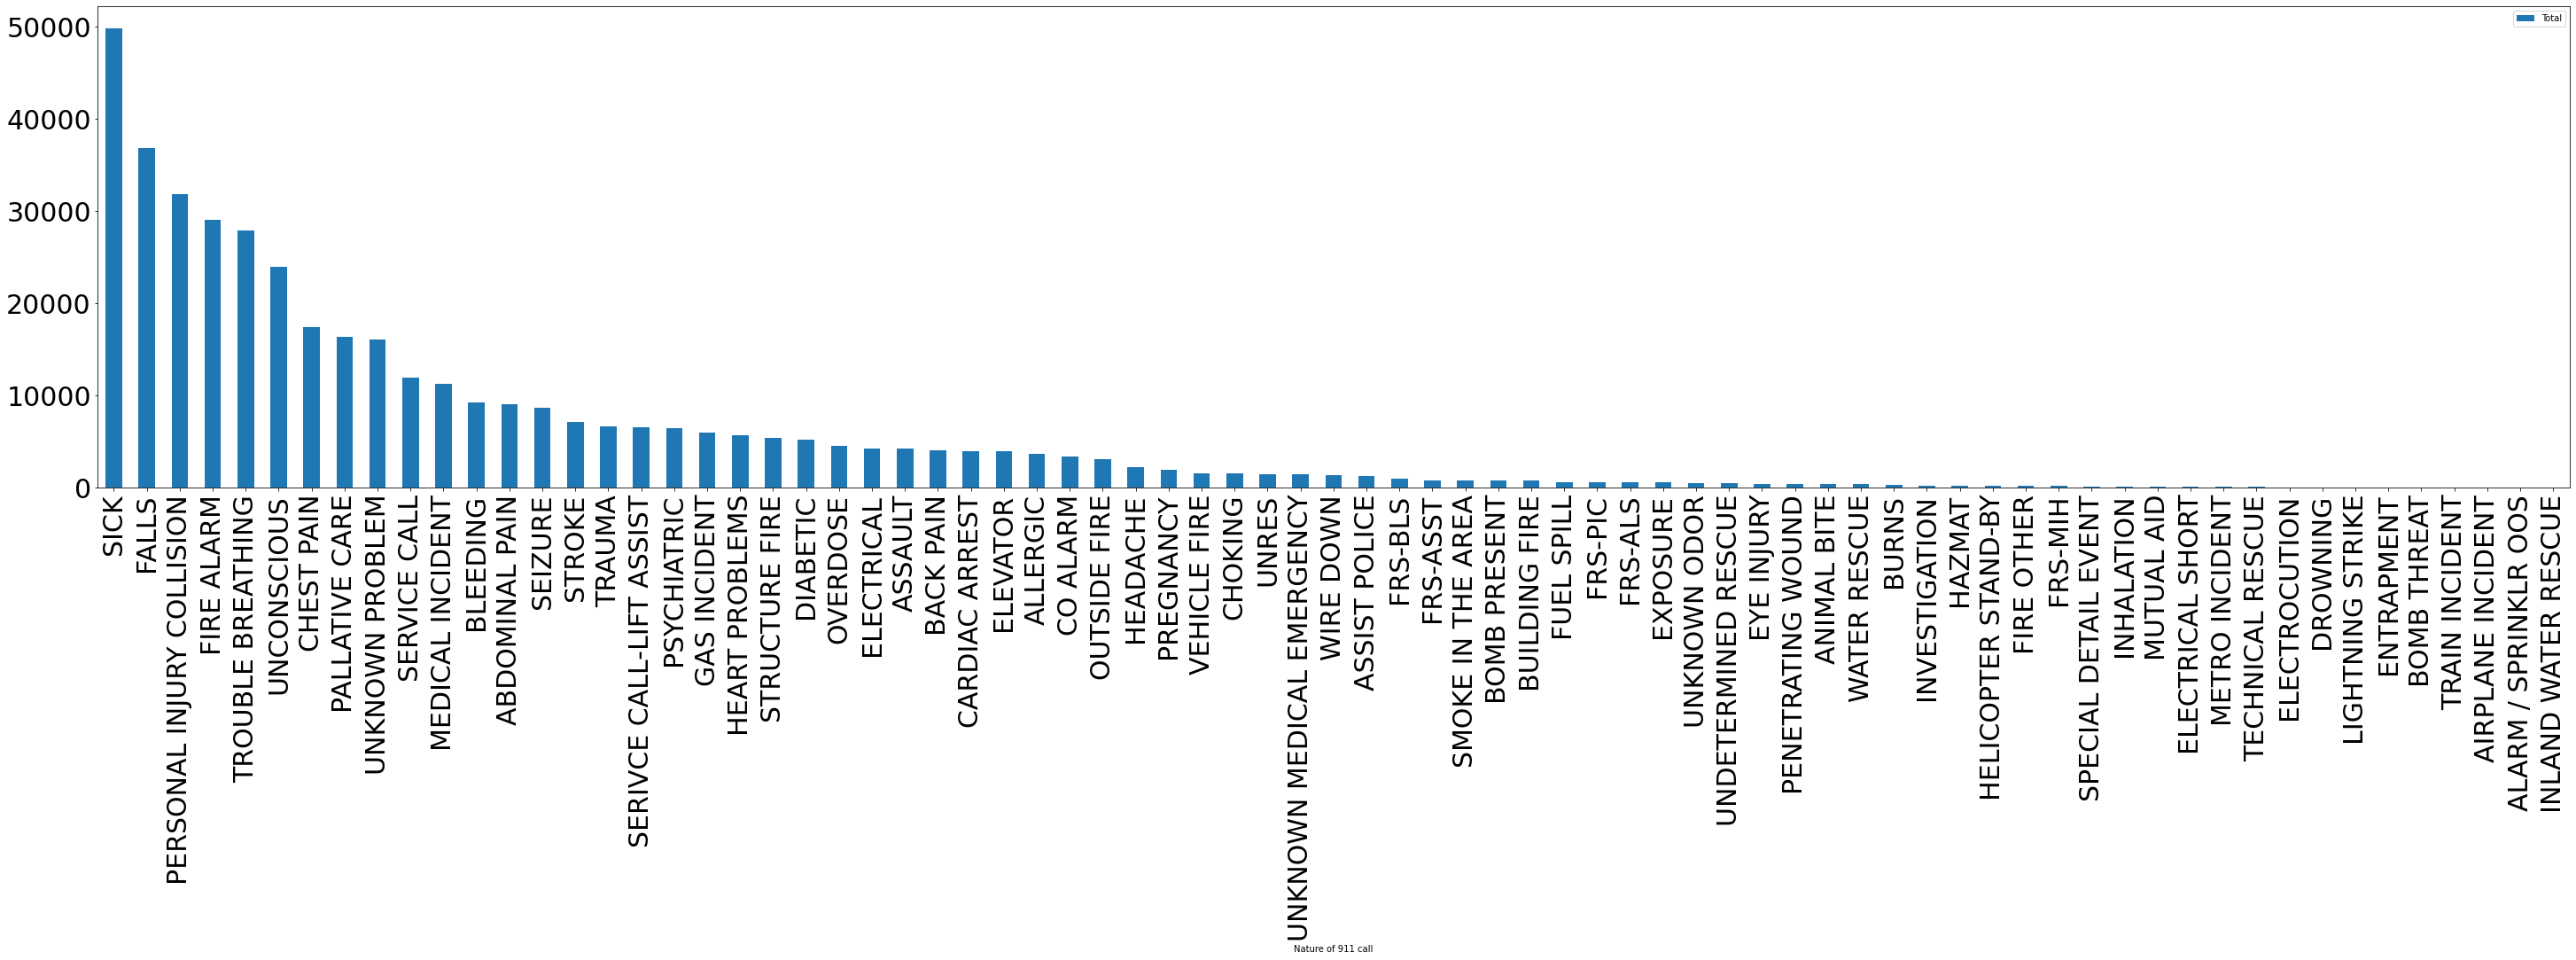

In [225]:
ax = call.sort_values(by='Total', ascending= False).plot.bar(figsize= (50,10))
ax.tick_params(axis = 'both', which= 'both', labelsize = 30 )

In [226]:
df['Year'].unique()

array([2017, 2018, 2016, 2019, 2021, 2020], dtype=object)

In [227]:
#calls for 2019
calls_2019= df[df['Year']==2019].groupby('Nature of 911 call').sum()[['Monthly Total']]\
            .rename(columns = {'Monthly Total':'Total'})['Total']
calls_2019.head()

Nature of 911 call
ABDOMINAL PAIN    2638
ALLERGIC           992
ANIMAL BITE        111
ASSAULT           1511
ASSIST POLICE       83
Name: Total, dtype: int64

In [228]:
#calls for 2020
calls_2020 = df[df['Year']==2020].groupby('Nature of 911 call').sum()[['Monthly Total']]\
            .rename(columns = {'Monthly Total':'Total'})['Total']
calls_2020.head()

Nature of 911 call
ASSAULT            3
ASSIST POLICE     92
BACK PAIN          1
BOMB PRESENT      46
BUILDING FIRE    326
Name: Total, dtype: int64

In [229]:
#Top 5 categories of call with the high Relative Growth 
growth =((calls_2020-calls_2019)/calls_2019).to_frame().rename(columns={'Total':'Growth'}).\
        sort_values(by='Growth', ascending=False)[:5]
growth

,Growth
Nature of 911 call,
INVESTIGATION,2.631579
WIRE DOWN,1.807229
ELECTRICAL SHORT,1.230769
BUILDING FIRE,1.050314
UNKNOWN MEDICAL EMERGENCY,0.638462


<AxesSubplot:xlabel='Nature of 911 call'>

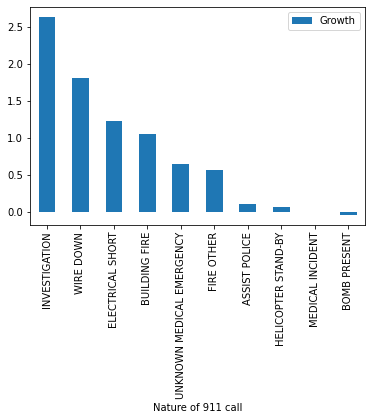

In [230]:
#Growth rate plot for top 10 categories
((calls_2020-calls_2019)/calls_2019).to_frame().rename(columns={'Total':'Growth'}).\
        sort_values(by='Growth', ascending=False)[:10].plot.bar()

#### Which fire stations responded to more than twice the average number of 'FIRE ALARM' calls in 2019 and 2020 combined?

In [115]:
df.head()

,Fire Station,Fire Station Number,Nature of 911 call,Monthly Total,Year,Month,Month Num,Station address
0,Kensington Volunteer Fire Department (Station 18),18,PREGNANCY,2,2017,MAY,5,"12251 Georgia Ave Wheaton, MD 20902"
1,Sandy Spring Volunteer Fire Department (40),40,BACK PAIN,5,2018,SEPTEMBER,9,"16911 Georgia Ave Olney, MD 20832"
2,Silver Spring Volunteer Fire Department (Stati...,16,INHALATION,1,2017,JUNE,6,"111 University Blvd East Silver Spring, MD 20901"
3,Gaithersburg-Washington Grove Volunteer Fire D...,8,EYE INJURY,3,2018,SEPTEMBER,9,"801 Russell Ave Gaithersburg, MD 20879"
4,Bethesda Fire Department (Station 20),20,MEDICAL INCIDENT,7,2018,SEPTEMBER,9,"9041 Old Georgetown Rd Bethesda, MD 20814"


In [145]:
total_resposes = df[(df.Year == 2019) | (df.Year == 2020)].groupby('Fire Station').sum()[['Monthly Total']].\
               rename(columns={'Monthly Total':'Total Responses'})
more_than_twice_avg_resp_stns = total_resposes[total_resposes['Total Responses'] > (2*(total_resposes['Total Responses'].mean()))].\
                               sort_values(by='Total Responses', ascending = False)
more_than_twice_avg_resp_stns

,Total Responses
Fire Station,
Gaithersburg-Washington Grove Volunteer Fire Department (Station 8),20145
Kensington Volunteer Fire Department (Station 25),17328


#### For all years, how many incidents were recorded for 'FALLS' for each fire department, and what percentage of the calls were for 'FALLS' (for each department)?

In [146]:
df.head()

,Fire Station,Fire Station Number,Nature of 911 call,Monthly Total,Year,Month,Month Num,Station address
0,Kensington Volunteer Fire Department (Station 18),18,PREGNANCY,2,2017,MAY,5,"12251 Georgia Ave Wheaton, MD 20902"
1,Sandy Spring Volunteer Fire Department (40),40,BACK PAIN,5,2018,SEPTEMBER,9,"16911 Georgia Ave Olney, MD 20832"
2,Silver Spring Volunteer Fire Department (Stati...,16,INHALATION,1,2017,JUNE,6,"111 University Blvd East Silver Spring, MD 20901"
3,Gaithersburg-Washington Grove Volunteer Fire D...,8,EYE INJURY,3,2018,SEPTEMBER,9,"801 Russell Ave Gaithersburg, MD 20879"
4,Bethesda Fire Department (Station 20),20,MEDICAL INCIDENT,7,2018,SEPTEMBER,9,"9041 Old Georgetown Rd Bethesda, MD 20814"


In [166]:
FALLS_calls = df[df['Nature of 911 call']=='FALLS'].groupby(['Fire Station', 'Nature of 911 call']).sum()[['Monthly Total']].\
              rename(columns = {'Monthly Total':'Total calls'})
FALLS_calls.head()

,,Total calls
Fire Station,Nature of 911 call,
Bethesda Fire Department (Station 20),FALLS,893
Bethesda Fire Department (Station 26),FALLS,961
Bethesda Fire Department (Station 6),FALLS,1566
Burtonsville Volunteer Fire Department (Station 15),FALLS,1461
Cabin John Park Volunteer Fire Department (Station 10),FALLS,757


In [184]:
total_calls = df.groupby(['Fire Station']).sum()[['Monthly Total']].rename(columns= {'Monthly Total':'Total calls'})
total_calls.head()

,Total calls
Fire Station,
Bethesda Fire Department (Station 20),12394
Bethesda Fire Department (Station 26),15949
Bethesda Fire Department (Station 6),20235
Burtonsville Volunteer Fire Department (Station 15),27980
Cabin John Park Volunteer Fire Department (Station 10),7681


In [194]:
FALSE_calls_percentage =  ((FALLS_calls['Total calls']/total_calls['Total calls'])*100)\
                          .reset_index()[['Fire Station', 'Total calls']].sort_values(by='Total calls', ascending= False)\
                          .rename(columns={'Total calls':'% FALLS Calls'}).reset_index()[['Fire Station', '% FALLS Calls']]
FALSE_calls_percentage

,Fire Station,% FALLS Calls
0,Kensington Volunteer Fire Department (Station 25),11.032621
1,Cabin John Park Volunteer Fire Department (Sta...,9.855488
2,Chevy Chase Fire Department (Station 7),9.234618
3,Sandy Spring Volunteer Fire Department (40),8.905935
4,Glen Echo Volunteer Fire Department (Station 11),8.690492
5,Rockville Volunteer Fire Department (Station 23),8.457365
6,Sandy Spring Volunteer Fire Department (Statio...,8.165665
7,Rockville Volunteer Fire Department (Station 33),7.875214
8,Bethesda Fire Department (Station 6),7.739066
9,Kensington Volunteer Fire Department (Station 5),7.559767


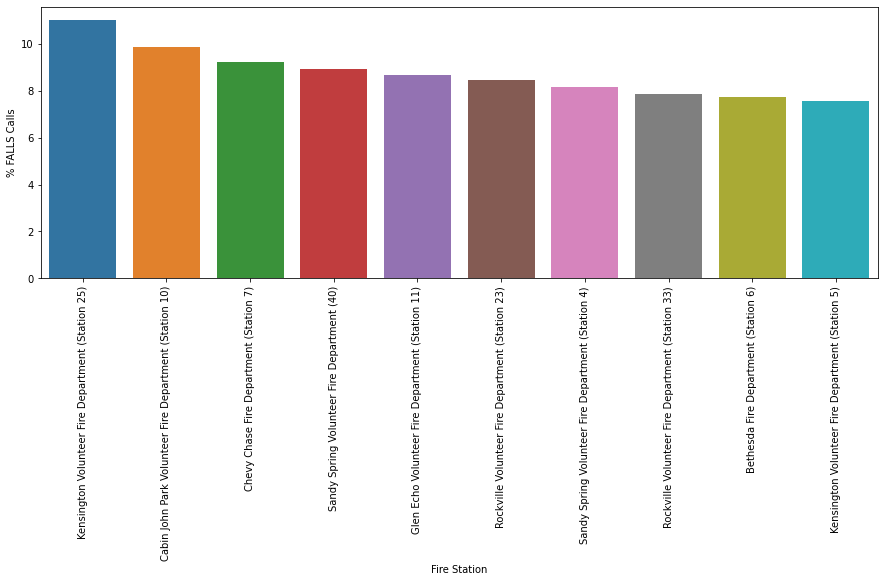

In [252]:
#visualizong top 10
fig = plt.figure(figsize=(15,5))
sns.barplot(x='Fire Station', y="% FALLS Calls", data=FALSE_calls_percentage[:10])
plt.xticks(rotation=90)
plt.show()